In [19]:
#> Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [20]:
#> Loading Mnist dataset
# Mnist Dataset: A group of 28x28 Images, that each has a label
(train_images,train_labels), (test_images,test_labels) =  mnist.load_data()
    #First time running this code will download mnist dataset in "C:/Users/Username/.keras/datasets"
    #] All variables are numpy vars, so we can use .shape on them like below
print(train_images.shape, "  |  ", test_images.shape)
#=> (nom_of_images,image_x_size,image_y_size)
"""
mydata1 = train_images[10:100]
mydata2 = train_images[10:100 , 10:20 , 0:27]
"""

(60000, 28, 28)   |   (10000, 28, 28)


'\nmydata1 = train_images[10:100]\nmydata2 = train_images[10:100 , 10:20 , 0:27]\n'

In [21]:
#> Working with tensors in Numpy
import numpy as np

# 0D tensor: Scalar
X0 = np.array(12)
print("X0 dimentions: ", X0.ndim); # Dimensions
print("X0 shape: ", X0.shape);     # Arrays in each dimension
print("X0 type: ", X0.dtype)       # Type of data

print("--------------------")

# 1D tensor: Vector
X1 = np.array([12.5,3,6.4,4])
print("X1 dimentions: ", X1.ndim);print("X1 shape: ", X1.shape);print("X1 type: ", X1.dtype)

print("--------------------")

# 2D tensor: Matrix
X2 = np.array([[1,3,6,4],
              [3,43,1,2],
              [14,5,7,4]])
print("X2 dimentions: ", X2.ndim);print("X2 shape: ", X2.shape);print("X2 type: ", X2.dtype)

X0 dimentions:  0
X0 shape:  ()
X0 type:  int32
--------------------
X1 dimentions:  1
X1 shape:  (4,)
X1 type:  float64
--------------------
X2 dimentions:  2
X2 shape:  (3, 4)
X2 type:  int32


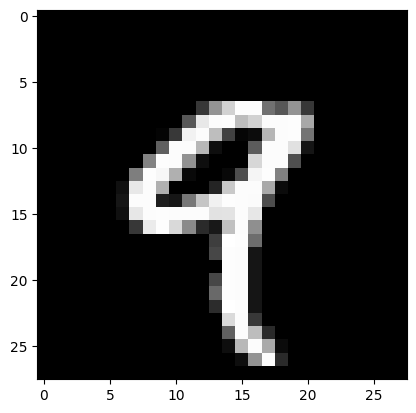

In [22]:
#> Printout an image
digit = train_images[4]
plt.imshow(digit, cmap="gray") #cmap="binary"

In [23]:
#> Loading CamVid dataset
    # Camvid Dataset: Photos of urban places (Consist of 12 classes)
import glob
import cv2
images_path = "F:/Coding/Faradars/Deep Learning (2) - TensorFlow & Keras/[fvml96071]_deep_learning_python/Files_and_codes/S02/Data/CamVid/train/"
images = glob.glob(images_path + "*.png")
images.sort()

In [24]:
#> Loading images
Img_List = []
width=200 ; height=200
for img in images:
    image = cv2.imread(img)
    #] Resizing
    image = cv2.resize(image, (width,height))
    #] Normalizing
    image = image / 255
        # if we do not know what is the max value, we can use np.max(image)
    #] Changing type
    image = image.astype(np.float32)
    
    Img_List.append(image)

In [25]:
#> Loading Labels
labels_path = "F:/Coding/Faradars/Deep Learning (2) - TensorFlow & Keras/[fvml96071]_deep_learning_python/Files_and_codes/S02/Data/CamVid/trainannot/"
labels = glob.glob(labels_path + "*.png")
labels.sort()

Y= []
out_width = 200  ;  out_height = 100
nClasses = 12
seg_labels = np.zeros([out_height,out_width,nClasses], dtype='uint8')
for mask in labels:
    label = cv2.imread(mask)
    # we don't need to normalize it and also it is not needed to make it float (classes are ints)
    label = cv2.resize(label, (width,height))
    label = label[:,:,0] #making it 2d (3rd is the rgb color and we don't want it)
    for c in range(nClasses):
        seg_labels[:,:,c] = (label==c)
    label = label.astype(np.uint8)
    Y.append(label)


In [26]:
#> make all of 60000  images to a vector with 784 length
X_train = train_images.reshape(60000,784)
X_test  = test_images.reshape (10000,784)
X_train = X_train.astype("float32")
X_test  = X_test.astype ("float32")
X_train /= 255
X_test  /= 255
    # we do this only for our images (because we don't need to change our labels we don't do this to them)

In [27]:
#> Make labels vector to categorical
    # example: if a label is labeled as 5, it will be a list that all indexes (0:12) will be zero except index 5 which will be 1
from keras.utils import np_utils
Y_train = np_utils.to_categorical(train_labels)
Y_test  = np_utils.to_categorical(test_labels )

In [28]:
#> Creating Model
from keras.models import Sequential
from keras.layers import Dense,Dropout
myModel = Sequential()
myModel.add(Dense(500 , activation='relu' , input_shape=(784,))) # input shape is only needed for the first layer
       # n of neurons , activation function (keras.activation.relu)
myModel.add(Dropout(0.2))
       # turn 20% of our neurons off
       #(read more about it in the plot cell)
myModel.add(Dense(100, activation='relu'))
myModel.add(Dropout(0.2))
myModel.add(Dense(10, activation='softmax')) #usually output activation is softmax

myModel.summary()
       #] if we want to change layers name:
              # myModel.layers[0].name = "Layer123"
       #] if we want to stop a layer to be trainable:
              # myModel.layers[0].trainable = False
       #] to get config of a layer:
              # moModel.layers[0].get_config()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
#> Compiling Model
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
myModel.compile(optimizer=SGD(learning_rate=0.001), loss=categorical_crossentropy, metrics=["accuracy"])
                        

In [30]:
#> Learn
network_history = myModel.fit(X_train,Y_train,batch_size=128,epochs=7,validation_split=0.2)#,verbose=0)
                                #] Vaildation_Split: we give % of devision in each train and test,
                                    # it will automaticly take it as validation and returns it
                                    # this will takes 20% as validation and learn with 80%
history = network_history.history # .history gives a dict

Epoch 1/7
375/375 [==============================] - 2s 5ms/step - loss: 2.2065 - accuracy: 0.2006 - val_loss: 2.0166 - val_accuracy: 0.4713
Epoch 2/7
375/375 [==============================] - 2s 5ms/step - loss: 1.9404 - accuracy: 0.4261 - val_loss: 1.7347 - val_accuracy: 0.6595
Epoch 3/7
375/375 [==============================] - 2s 4ms/step - loss: 1.6834 - accuracy: 0.5646 - val_loss: 1.4597 - val_accuracy: 0.7325
Epoch 4/7
375/375 [==============================] - 2s 4ms/step - loss: 1.4498 - accuracy: 0.6391 - val_loss: 1.2246 - val_accuracy: 0.7725
Epoch 5/7
375/375 [==============================] - 2s 4ms/step - loss: 1.2577 - accuracy: 0.6826 - val_loss: 1.0384 - val_accuracy: 0.8009
Epoch 6/7
375/375 [==============================] - 2s 5ms/step - loss: 1.1141 - accuracy: 0.7105 - val_loss: 0.8967 - val_accuracy: 0.8217
Epoch 7/7
375/375 [==============================] - 2s 5ms/step - loss: 0.9920 - accuracy: 0.7379 - val_loss: 0.7901 - val_accuracy: 0.8359


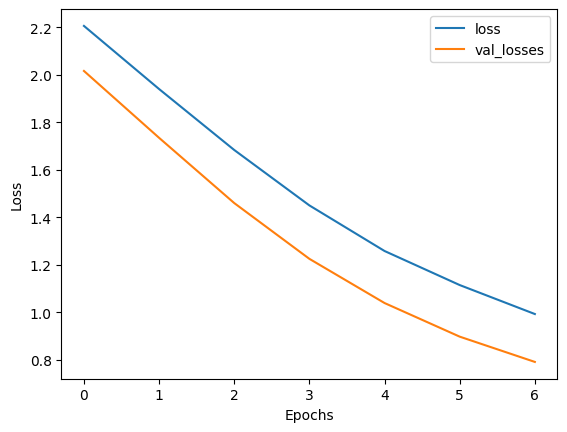

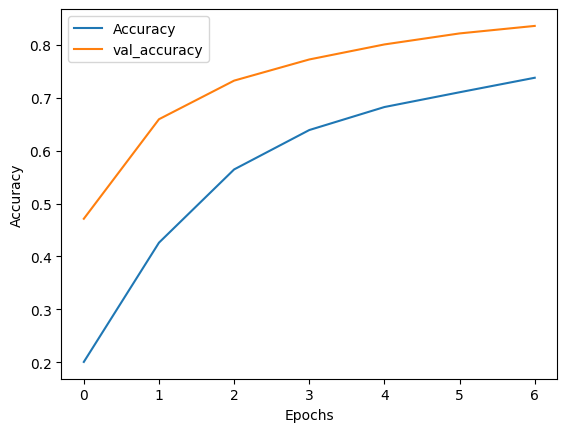

In [31]:
losses = history["loss"]
accuracies = history["accuracy"]
val_losses = history['val_loss']
val_accurecies = history['val_accuracy']
plt.plot(losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_losses'])
    # when these 2 plots are going same way, it's ok but when train goes down
        # but validation wen up, it is porbabely overfitted  
        # we have to add a drop-out layer 
            # Dropout will reduce parameters and prevents over-fitting (not completely)

plt.figure()

plt.plot(accuracies)
plt.plot(val_accurecies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','val_accuracy'])


In [35]:
#> Evaluation
test_loss, test_accuracy = myModel.evaluate(X_test,Y_test)
test_labels_predicted = myModel.predict(X_test)
    # when you check the variable you will see the next line gets the max for each row
test_labels_predicted = np.argmax(test_labels_predicted,axis=1)

313/313 [==============================] - 0s 2ms/step


In [1]:
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [3]:
#> Using Mnist dataset
(x_train,_),(x_test,_) = mnist.load_data()
    # If the emnist dataset is not downloaded yet, it will be downloaded in C:/Users/Username/.Keras/datasets
# print()

In [4]:
inp_img = Input(shape=(784,)) #input placeholder
encoded = Dense(32,activation="relu")(inp_img)   # encoded representation of the input
decoded = Dense(784,activation="sigmoid")(encoded) # lossy reconstruction of the input

In [5]:
# this model maps an input to its reconstruction
auto_encoder = Model(inp_img,decoded)

auto_encoder.compile(optimizer="adam",loss="binary_crossentropy")
auto_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [6]:
# normalize all values between 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# change size (reshape) images from 28x28 to 784 borders   (60000,28,28) => (60000,784)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    # Equals to:             60000     , 784
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
auto_encoder.fit(x_train,x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test,x_test))
               # input,  output,  steps, how many to give each time          

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2773 - val_loss: 0.1910
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1719 - val_loss: 0.1545
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1452 - val_loss: 0.1343
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1292 - val_loss: 0.1221
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1189 - val_loss: 0.1135
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1116 - val_loss: 0.1073
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1063 - val_loss: 0.1029
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1024 - val_loss: 0.0995
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0995 - val_loss: 0.0972
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0976 - val_loss: 0.0956

313/313 [==============================] - 0s 887us/step


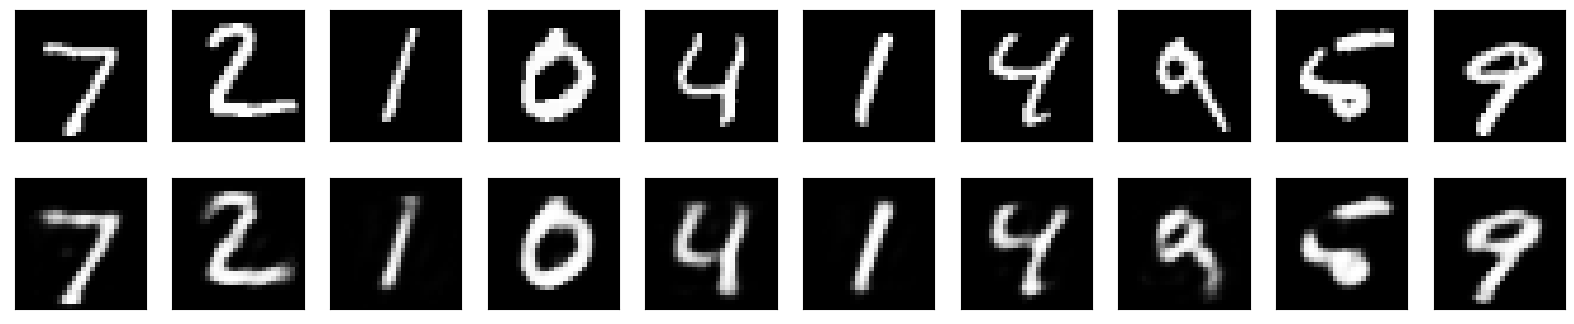

In [9]:
decoded_imgs = auto_encoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
'''
Working with tensors in Numpy
'''

import numpy as np

# 0D tensor: Scalar
X0 = np.array(12)
print("X0 dimentions: ", X0.ndim)
print("X0 shape: ", X0.shape)
print("X0 type: ", X0.dtype)

print("--------------------")

# 1D tensor: Vector
X1 = np.array([12.5,3,6.4,4])
print("X1 dimentions: ", X1.ndim)
print("X1 shape: ", X1.shape)
print("X1 type: ", X1.dtype)

print("--------------------")

# 2D tensor: Matrix
X2 = np.array([[1,3,6,4],
              [3,43,1,2],
              [14,5,7,4]])
print("X2 dimentions: ", X2.ndim)
print("X2 shape: ", X2.shape)
print("X2 type: ", X2.dtype)